## IMPORT LIBRARY

In [59]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [60]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## UPLOAD FILE dan BACA FILE CSV

In [61]:
from google.colab import files
df_story = files.upload()
df_story=pd.read_csv('storyy.csv')

Saving storyy.csv to storyy (2).csv


## PREPROCESSING DATA



### Menampilkan Data Story Teratas

In [62]:
df_story.head()

,id,judul,daerah-asal,overview,karakter-utama,penulis,tema,genre
0,1,Atu Belah,Nanggroe Aceh Darussalam,Sebuah keluarga miskin di Tanah Gayo mengalami...,"['Ibu', 'Ayah', 'Sulung']",Azka Press,"['Kemiskinan', ' Pengorbanan', 'Berubah']",Mitos
1,2,Pangeran Amat Mude,Nanggroe Aceh Darussalam,"Pangeran Amat Mude, setelah menghadapi berbaga...","['Pangeran Amat Mude', 'Paman']",Dian Kristiani,"['Perlawanan', 'Keberanian', 'Kerajaan']",Legenda
2,3,Kisah Si Raja Parkit,Nanggroe Aceh Darussalam,Seorang raja burung parkit memimpin kelompokny...,['Raja Parkit'],Ari Wulandari,"['Kecerdikan', 'Kebersamaan', 'Pengorbanan']",Fabel
3,4,Terjadinya Danau Toba,Nanggroe Aceh Darussalam,Seorang pemuda yang menemukan ikan emas besar ...,"['Pemuda', 'Gadis Jelmaan Ikan']",Dede Firmansyah,"['Cinta', 'Berubah']",Legenda
4,5,Putri Ular,Sumatera Utara,Sebuah kisah tentang seorang putri cantik yang...,['Putri'],Dian Kristiani,"['Ucapan', 'Berubah', ' Hukuman']",Mitos


### Mengecek Informasi DataFrame Story

In [63]:
df_story.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    int64 
 1   judul           100 non-null    object
 2   daerah-asal     100 non-null    object
 3   overview        100 non-null    object
 4   karakter-utama  100 non-null    object
 5   penulis         100 non-null    object
 6   tema            100 non-null    object
 7   genre           100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


### Mengecek Missing Value

In [64]:
print("Jumlah Missing Values dalam data:")
df_story.isna().sum()

Jumlah Missing Values dalam data:


id                0
judul             0
daerah-asal       0
overview          0
karakter-utama    0
penulis           0
tema              0
genre             0
dtype: int64

### Mengecek Duplikat Data

In [65]:
print("Jumlah Duplikat dalam data:", df_story.duplicated().sum())

Jumlah Duplikat dalam data: 0


### Pengecekan Data Bernilai '?' di DataFrame

In [66]:
print("Apakah terdapat data bernilai ? dalam data:")
df_story.isin(['?']).any()

Apakah terdapat data bernilai ? dalam data:


id                False
judul             False
daerah-asal       False
overview          False
karakter-utama    False
penulis           False
tema              False
genre             False
dtype: bool

### Menghitung Jumlah Nilai NaN dalam DataFrame

In [67]:
print("Jumlah nilai Nan dalam data:")
df_story.isna().sum()

Jumlah nilai Nan dalam data:


id                0
judul             0
daerah-asal       0
overview          0
karakter-utama    0
penulis           0
tema              0
genre             0
dtype: int64

### Menghapus Kolom 'karakter-utama' dari Dataset

In [68]:
df_story = df_story.drop(['karakter-utama', 'tema'], axis=1)

### Rename kolom 'daerah-asal' menjadi 'daerah_asal'

In [69]:
df_story.rename(columns={"daerah-asal": "daerah_asal"}, inplace=True)
df_story.tail()

,id,judul,daerah_asal,overview,penulis,genre
95,96,Asal usul Burung Cenderawasih,Papua Barat,Kweiya dan ibunya berubah menjadi burung cende...,Lilis Hu,Legenda
96,97,Pande Gelang,Banten,Ki Pande berhasil mengalahkan Pangeran Cunihin...,Dian Kristiani,Legenda
97,98,Hikayat Tanjung Lesung,Banten,Raden Budog menemukan dan menikahi gadis impia...,Unknown,Legenda
98,99,Kisah Batu Kuwung,Banten,Ki Sarmin sembuh dari kelumpuhan setelah berta...,Nita Anggraeni,Legenda
99,100,Kisah Bulu Tengon,Kalimantan Utara,"Ku Anyi, seorang pria terhormat di desa, menem...",Dian Kristiani,Legenda


## VISUALISAI DATA

### Visualisasi Jumlah Cerita Berdasarkan Daerah Asal dengan Plotly

In [70]:
story_counts =df_story['daerah_asal'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=story_counts.index, y=story_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Number of Story Based on Region of Oringin',
    xaxis=dict(title='Region'),
    yaxis=dict(title='Number of Story')
)
fig.update_traces(marker_color='pink')
fig.show()

### Menampilkan Variasi Penulisan Label Genre dalam DataFrame

In [71]:
# Menampilkan variasi penulisan label-genre
unique_genre = df_story['genre'].unique()
print("Variasi penulisan label-genre:")
print(unique_genre)

Variasi penulisan label-genre:
['Mitos' 'Legenda' 'Fabel' 'Sage']


### Visualisasi Distribusi Genre Cerita dengan Pie Chart

In [72]:
story_genre_counts = df_story['genre'].value_counts()

fig = go.Figure(data=go.Pie(labels=story_genre_counts.index, values=story_genre_counts.values))
fig.update_layout(plot_bgcolor='rgb(17, 17, 17)',paper_bgcolor='rgb(17, 17, 17)',
    font_color='white', title='Genre Distribution of Stories')
fig.show()

### Visualisasi Jumlah Cerita oleh 5 Penulis Teratas

In [73]:
penulis_counts = df_story['penulis'].value_counts()

top_5_penulis = penulis_counts.head(5)
fig = go.Figure(data=go.Bar(x=top_5_penulis.index, y=top_5_penulis.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Number of Stories by Top 5 Authors',
    xaxis=dict(title='Author'),
    yaxis=dict(title='Number of Stories')
)
fig.update_traces(marker_color='orange')
fig.show()

## PREPROCESSING TEKS

### Prapemrosesan Teks untuk Analisis

In [74]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]
    return ' '.join(tokens)

In [75]:
for col in ['overview', 'penulis', 'daerah_asal', 'genre']:
    df_story[col] = df_story[col].apply(preprocess_text)

### Membuat Kolom Teks Gabungan dari Kolom terpilih dalam DataFrame

In [76]:
df_story['combined_text'] = df_story.apply(lambda row: ' '.join([
    row['overview'],
    row['penulis'],
    row['daerah_asal'],
    row['genre']
]), axis=1)

## PEMBUATAN REPRESENTASI VEKTOR

### Membuat Representasi Vektor TF-IDF dari Teks Gabungan dalam DataFrame

In [77]:
vectorizer = TfidfVectorizer(max_features=951)
text_vectors = vectorizer.fit_transform(df_story['combined_text']).toarray()

## PEMODELAN

### Membangun Arsitektur Jaringan Saraf Tiruan untuk Klasifikasi Cerita

In [78]:
num_stories = len(df_story)
input_shape = text_vectors.shape[1]
input_text = Input(shape=(input_shape))
x = Dense(128, activation='relu')(input_text)
x = Dense(64, activation='relu')(x)
output = Dense(num_stories, activation='softmax')(x)

### Pembagian Data untuk Pelatihan dan Validasi Model Klasifikasi Cerita

In [79]:
train_labels = np.eye(num_stories)
X_train, X_val, y_train, y_val = train_test_split(text_vectors, train_labels, test_size=0.2, random_state=42)

### Kompilasi dan Konfigurasi Model Klasifikasi Cerita

In [80]:
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Pelatihan dan Evaluasi Model Klasifikasi Cerita

In [81]:
history = model.fit(text_vectors, train_labels, epochs=100, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 4.6068 - accuracy: 0.0000e+00 - val_loss: 4.5763 - val_accuracy: 0.0500
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 4.5720 - accuracy: 0.1200 - val_loss: 4.5489 - val_accuracy: 0.3000
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 4.5430 - accuracy: 0.3200 - val_loss: 4.5165 - val_accuracy: 0.5500
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 4.5095 - accuracy: 0.4600 - val_loss: 4.4753 - val_accuracy: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4.4690 - accuracy: 0.6300 - val_loss: 4.4258 - val_accuracy: 0.7500
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 4.4174 - accuracy: 0.7000 - val_loss: 4.3652 - val_accuracy: 0.8500
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 4.3550 - accuracy: 0.8000 - val_loss: 4.2917 - val_accuracy: 0.9500
Epoch 8/100
7/7 [==

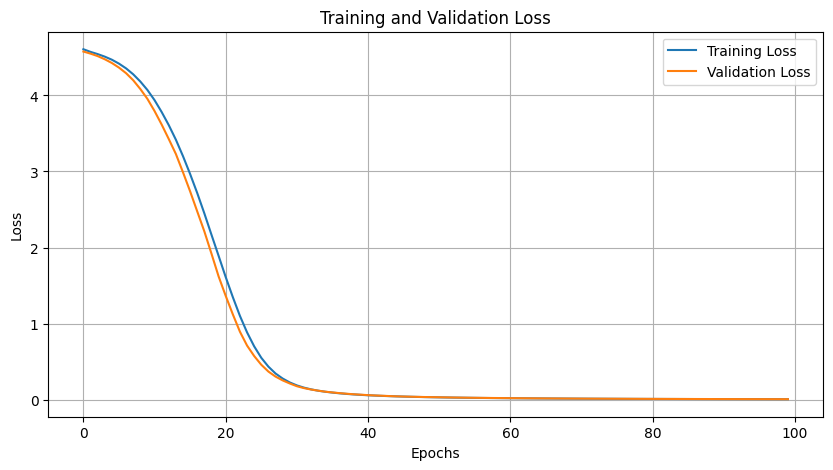

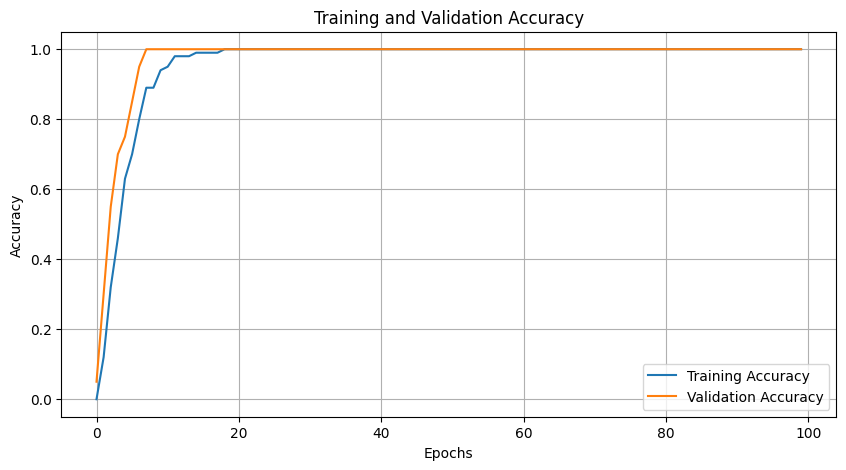

In [82]:
# Mendapatkan loss dan akurasi dari riwayat pelatihan
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Membuat grafik loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Membuat grafik akurasi
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## FUNGSI REKOMENDASI dan PENYIMPANAN MODEL

### Fungsi Rekomendasi Cerita untuk Pengguna Berdasarkan ID Cerita yang telah dibaca

In [83]:
def recommend_stories_for_story(story_id, top_n=5):
    # Get the combined text for the specified story
    story_text = df_story[df_story['id'] == story_id]['combined_text'].values[0]

    # Preprocess the story text
    processed_story_text = preprocess_text(story_text)

    # Vectorize the story text
    story_vector = vectorizer.transform([processed_story_text]).toarray()

    # Predict with the model
    predictions = model.predict(story_vector)
    recommended_story_indices = np.argsort(predictions[0])[-(top_n+1):][::-1]  # Get top N indices

    # Filter out the specified story itself
    recommended_stories = df_story.iloc[recommended_story_indices]
    recommended_stories = recommended_stories[recommended_stories['id'] != story_id][:top_n]

    return recommended_stories

In [84]:
story_id = int(input("Story ID:"))
recommended_stories = recommend_stories_for_story(story_id)

Story ID:10
1/1 [==============================] - 0s 59ms/step


In [85]:
print("Rekomendasi cerita untuk cerita ID", story_id, ":")
for idx, story in recommended_stories.iterrows():
    print(f"- {story['judul']}")

Rekomendasi cerita untuk cerita ID 10 :
- Asal Mula Telaga Biru
- Lok si Naga
- Sangi sang Pemburu
- Burung Tempua dan Burung Puyuh
- Putri Ular


### Menyimpan Model Klasifikasi Cerita ke File JSON dan HDF5

In [86]:
from tensorflow.keras.models import model_from_json

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("rekomendasi_byStoryID.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("byStoryID_weights.h5")

print("Model architecture and weights have been saved.")

Model architecture and weights have been saved.


In [87]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

np.save('text_vectors.npy', text_vectors)
